In [1]:
%matplotlib inline
import numpy as np
import pylab as pl
import scipy.special as special
from scipy.integrate import quad
from scipy.integrate import nquad

# Set plot parameters to make beautiful plots
pl.rcParams['figure.figsize']  = 12, 7.5
pl.rcParams['lines.linewidth'] = 1.5
pl.rcParams['font.family']     = 'serif'
pl.rcParams['font.weight']     = 'bold'
pl.rcParams['font.size']       = 20  
pl.rcParams['font.sans-serif'] = 'serif'
#pl.rcParams['text.usetex']     = True
pl.rcParams['axes.linewidth']  = 1.5
pl.rcParams['axes.titlesize']  = 'medium'
pl.rcParams['axes.labelsize']  = 'medium'

pl.rcParams['xtick.major.size'] = 8     
pl.rcParams['xtick.minor.size'] = 4     
pl.rcParams['xtick.major.pad']  = 8     
pl.rcParams['xtick.minor.pad']  = 8     
pl.rcParams['xtick.color']      = 'k'     
pl.rcParams['xtick.labelsize']  = 'medium'
pl.rcParams['xtick.direction']  = 'in'    

pl.rcParams['ytick.major.size'] = 8     
pl.rcParams['ytick.minor.size'] = 4     
pl.rcParams['ytick.major.pad']  = 8     
pl.rcParams['ytick.minor.pad']  = 8     
pl.rcParams['ytick.color']      = 'k'     
pl.rcParams['ytick.labelsize']  = 'medium'
pl.rcParams['ytick.direction']  = 'in'    

In [2]:
#want to plot the integrand in Eq. 60 of the paper
#with filled in values of I(...), delta(yn), 

#constants in natural units
m = 1.
c = 1.
theta_e = 10.
#nu_c = 1
B = 10.
e = 1


#constants in Gaussian cgs units (values from harmony)
#m = 9.1093826e-28
#c = 2.99792458e10
#e = 4.80320680e-10
#B = 30.0
#n_e = 100000.


theta = np.pi/3.
epsilon = 0.01
n_e = 1
nu_c = e * B / (2. * np.pi * m * c)
nu = 700000. * nu_c
nu_s = (2./9.) * nu_c * theta_e**2 * np.sin(theta)

#cos_xi = np.arange(-1., 1., 2./100)
#cos_xi = (gamma * nu - n_e * nu_c) / (gamma * nu * beta * np.cos(theta))
#gamma = np.arange(1, 11, 0.1)

#def delta_function(n, gamma):
#    beta = np.sqrt(1. - 1./gamma**2.)
#    cos_xi = (gamma * nu - n_e * nu_c) / (gamma * nu * beta * np.cos(theta))
#    argument = (n * nu_c)/gamma - nu * (1 - beta * cos_xi * np.cos(theta))
#    f = (1/(epsilon * np.sqrt(np.pi))) * np.exp(-argument**2./epsilon**2.)
#    return f


n_dn = (nu / nu_c) * abs(np.sin(theta))
#beta_here = np.sqrt(1. - 1./((1. + theta_e)**2)) 
#ans = (theta_e + 1.) * (nu/nu_c) * (1. - beta_here**2 * (np.cos(theta))**2)
C = 10.

#def n_up(gamma):
#    beta = np.sqrt(1. - 1./gamma**2.)
#    ans = 10.* (theta_e + 1. + (2. * theta_e * nu/nu_c)**(1./3.)) * (nu/nu_c) * (1. - beta**2 * (np.cos(theta))**2)
#    return ans
    
    
def K_s(n, gamma):
    beta = np.sqrt(1. - 1./gamma**2.)
    cos_xi = (gamma * nu - n * nu_c) / (gamma * nu * beta * np.cos(theta))
    M = (np.cos(theta) - beta * cos_xi)/np.sin(theta)
    N = beta * np.sqrt(1. - cos_xi**2)
    z = (nu * gamma * beta * np.sin(theta) * np.sqrt(1. - cos_xi**2))/nu_c
    K_xx = M**2 * (special.jv(n, z))**2
    K_yy = N**2 * (special.jvp(n, z, 1))**2
    ans = K_xx + K_yy
    return ans

def MJ_f(gamma):
    beta = np.sqrt(1. - 1./gamma**2.)
    prefactor_MJ  = 1. / (m**3 * c**3 * gamma**2 * beta)
    thermal_dist_prefactor = n_e / (4. * np.pi * theta_e)
    thermal_dist_exp = np.exp(- gamma/theta_e)
    thermal_dist_body = gamma * np.sqrt(gamma**2 - 1.)/special.kn(2., 1./theta_e)
    thermal_dist = thermal_dist_prefactor * thermal_dist_body * thermal_dist_exp
    MJ = prefactor_MJ * thermal_dist
    return MJ

#def jnu_integrand_in_eq60(cos_xi, gamma, n):
#    beta = np.sqrt(1. - 1./gamma**2.)
    
#    prefactor_Jnu = 2. * np.pi * e**2 * nu**2 / c
    
#    d_3_p = m**3 * c**3 * gamma**2 * beta * 2 * np.pi
    
#    I = prefactor_Jnu * MJ_f(gamma) * d_3_p * K_s(n, gamma, cos_xi)
    
#    f = delta_function(n, gamma, cos_xi) * I


#   change the order of integral, which means integral over gamma first, then sum over n

def I_in_eq62(gamma, n):
    
    beta = np.sqrt(1. - 1./gamma**2.)
    cos_xi = (gamma * nu - n * nu_c) / (gamma * nu * beta * np.cos(theta))
    
    prefactor_Jnu = 2. * np.pi * e**2 * nu**2 / c
    d_3_p = m**3 * c**3 * gamma**2 * beta * 2 * np.pi
    
    ans = prefactor_Jnu * MJ_f(gamma) * d_3_p * K_s(n, gamma)
    
    return ans

def gamma_up_limit(n):
    gamma_up_nume = (n * nu_c /nu) + np.absolute(np.cos(theta)) * np.sqrt((n * nu_c /nu)**2 - (np.sin(theta))**2)
    gamma_deno = (np.sin(theta))**2
    gamma_up = gamma_up_nume / gamma_deno
    return gamma_up

def gamma_dn_limit(n):
    gamma_dn_nume = (n * nu_c /nu) - np.absolute(np.cos(theta)) * np.sqrt((n * nu_c /nu)**2 - (np.sin(theta))**2)
    gamma_deno = (np.sin(theta))**2
    gamma_dn = gamma_dn_nume / gamma_deno
    return gamma_dn
    
    
def jnu_integrand_in_eq62(gamma, n):
    
    beta = np.sqrt(1. - 1./gamma**2.)
    cos_xi = (gamma * nu - n * nu_c) / (gamma * nu * beta * np.cos(theta))
    
    prefactor_62 = 1. / (nu * beta * np.absolute(np.cos(theta)))
    
    f = prefactor_62 * I_in_eq62(gamma, n)
    
    return f

def jnu_n_integral_62_one(n):
    
    def jnu_integrand_in_eq62_gamma(gamma):
        jnu_integrand_62 = jnu_integrand_in_eq62(gamma, n)
        return jnu_integrand_62
    
    ans_once = quad(jnu_integrand_in_eq62_gamma, gamma_dn_limit(n), gamma_up_limit(n), epsabs = 0, epsrel = 1e-8)[0]
    
    return ans_once

#print jnu_n_integral_62_one(500)

#def n_peak(nu):
#    if nu < nu_c * theta_e**2:
#        beta_here = np.sqrt(1. - 1./((1. + theta_e)**2)) 
#        ans = (theta_e + 1.) * (nu/nu_c) * (1. - beta_here**2 * (np.cos(theta))**2)
#    else:
#        beta_here = np.sqrt(1. - (2. * theta_e * nu / nu_c)**(- 2./3.))
#        ans = (2. * theta_e * nu /nu_c )**(1./3.) * (nu/nu_c) * (1. - beta_here**2 * (np.cos(theta))**2)
#    return ans

gamma_here_1 = np.sqrt((1. + theta_e) * (2. * theta_e * nu/nu_c)**(1./3.))
beta_here_1  = np.sqrt(1. - 1./(gamma_here_1**2))
n_peak_first_part = (theta_e + 1. + (2. * theta_e * nu/nu_c)**(1./3.))
n_peak_second_part = (nu/nu_c) * (1. - (beta_here_1 * np.cos(theta))**2)
n_peak       = n_peak_first_part * n_peak_second_part


def jnu_62_integral_from_n_max_to_n_limit(n_max, n_dn):
    
    if(n_max < n_dn):
        n_max = n_dn
    
    ans = quad(jnu_n_integral_62_one, n_max, C * n_peak, epsabs = 0, epsrel = 1e-8)[0]
    
    return ans
    

def jnu_62_sum_to_n_max_integral_to_n_limit(n_max_sum):
    ans = 0
    for i in range(int(n_dn + 1.), int(1 + n_dn + n_max_sum)):
        ans = ans + jnu_n_integral_62_one(i)
#        print ans
        
    total = ans + jnu_62_integral_from_n_max_to_n_limit(n_max_sum, n_dn)
    return total

#print n_peak

In [55]:
n_max_sum = 30.

print jnu_62_sum_to_n_max_integral_to_n_limit(n_max_sum)
#print jnu_62_integral_from_n_max_to_n_limit(n_max_sum, n_dn)

3.76020760004e-11


//anaconda/lib/python2.7/site-packages/scipy/integrate/quadpack.py:352: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


In [17]:
n_up = 10. * (theta_e + 1.) * (nu/nu_c) * (1. - beta_here**2 * (np.cos(theta))**2)
print n_up

NameError: name 'beta_here' is not defined

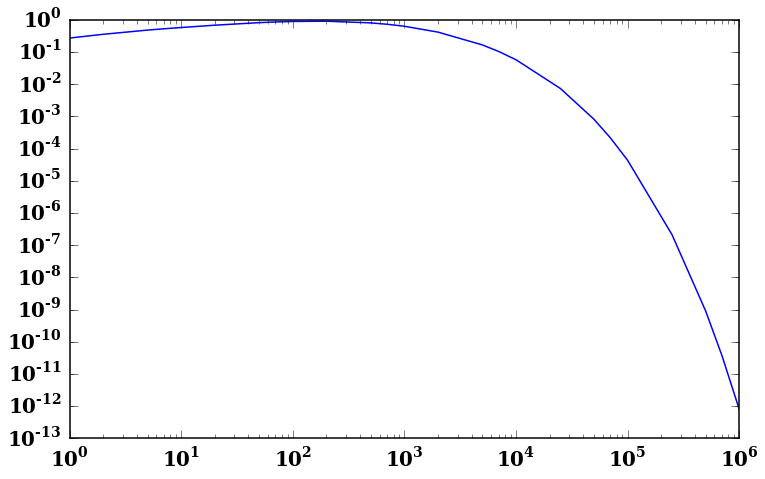

In [3]:
data = np.loadtxt('/Users/zhaoweizhang/Documents/summer_new/my_data_1/thermal_data.txt')
pl.loglog(data[:,0], data[:,1])

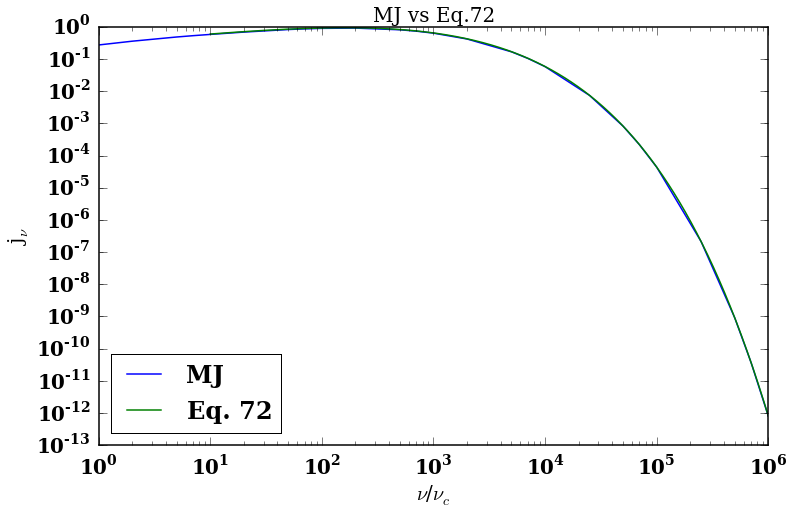

In [4]:
def jnu_72(x):
    jnu_72_prefactor = n_e * np.sqrt(2) * np.pi * e**2 * nu_s / (3. * special.kn(2., 1./theta_e) * c)
    jnu_72_body = (np.sqrt(x/nu_s) + 2.**(11./12.) * (x/nu_s)**(1./6.))**2
    jnu_72_exp = np.exp(- (x/nu_s)**(1./3.))
    jnu_approximation_72 = jnu_72_prefactor * jnu_72_body * jnu_72_exp
    
    return jnu_approximation_72

x = np.arange(10*nu_c, 1000000*nu_c, 1)
pl.xlabel("$\\nu$/$\\nu_c$")
pl.ylabel("j$_\\nu$")

data = np.loadtxt('/Users/zhaoweizhang/Documents/summer_new/my_data_1/thermal_data.txt')

#since we are plotting nu/nu_c, and X = nu/nu_s, we
#need to plot (X * nu_s)/nu_c, eq_72(X)
pl.loglog(data[:, 0], data[:, 1], label = 'MJ')
pl.loglog(x/nu_c, jnu_72(x), label = 'Eq. 72')
pl.legend(loc = 'lower left')
pl.title("MJ vs Eq.72")
pl.show()


In [10]:
def jnu_compare_62_vs_72(n_max_sum):
    ans =(jnu_72(nu)/jnu_62_sum_to_n_max_integral_to_n_limit(n_max_sum)) - 1.
    return ans

In [11]:
n_max_sum = 30
jnu_compare_62_vs_72(n_max_sum)

9.0481276771540315

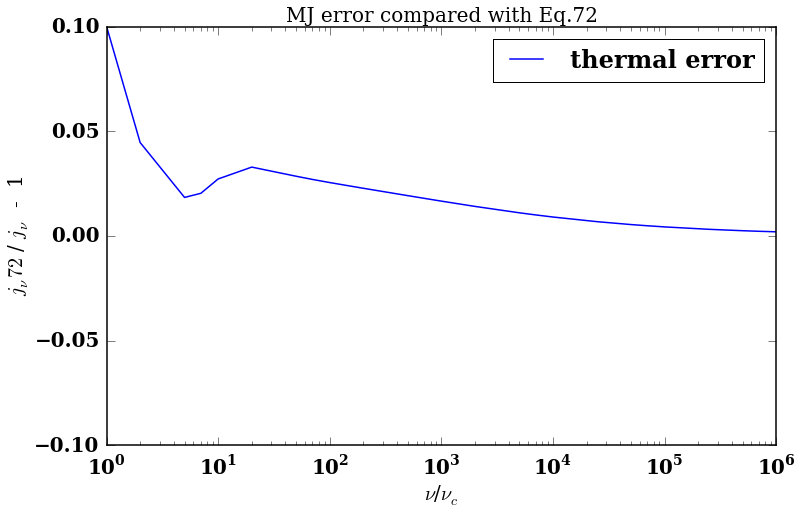

In [5]:
data = np.loadtxt('/Users/zhaoweizhang/Documents/summer_new/my_data_1/thermal_data.txt')

def error_thermal_with_eq72():
    
    data_x = data[:, 0]
    
    ans = jnu_72(data_x * nu_c)
    
    error = ans / data[:, 1] - 1.
    
    return error
    
pl.xlabel("$\\nu$/$\\nu_c$")
pl.ylabel("$j_\\nu72$ / $j_\\nu$  -  1")

pl.semilogx(data[:, 0], error_thermal_with_eq72(), label = 'thermal error')
pl.ylim([-0.1,0.1])

pl.legend()
pl.title("MJ error compared with Eq.72")
pl.show()
    

In [136]:
1e10

10000000000.0

In [137]:
1e2

100.0

In [138]:
1e1

10.0

In [139]:
10e10

100000000000.0

In [141]:
10.e1

100.0